In [ ]:
#LinReg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

df = pd.read_csv('filtered_data.csv')

X = df[['creatinine.enzymatic.method','LVEF']]
y = df['death']

#split data into test and train datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)


model = LinearRegression()
loss_history = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)

y_pred_bin = (y_pred > 0.06).astype(int)
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, y_pred_bin).ravel()


print("True Negative: ", true_neg)
print("True Positive: ", true_pos)
print("False Negative: ", false_neg)
print("False Positive: ", false_pos)

accuracy = (true_pos + true_neg) / (true_pos + false_pos + true_neg + false_neg)
precision = true_pos / (true_pos + false_pos)
sensitivity_recall = true_pos / (true_pos + false_neg)
f_1 = 2*((precision * sensitivity_recall)/(precision + sensitivity_recall))
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
false_pos_roc, true_pos_roc, thresh_roc = roc_curve(y_test, y_pred)
auc = auc(false_pos_roc, true_pos_roc)


print("Linear Regression MSE:", mse_lin)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Sensitivity/Recall: ", sensitivity_recall)
print("F1: ", f_1)
print("R2:", r2score)

print("Mean Absolute Error:", mae)




True Negative:  151
True Positive:  1
False Negative:  2
False Positive:  2
Linear Regression MSE: 0.018009589848607597
Accuracy:  0.9743589743589743
Precision:  0.3333333333333333
Sensitivity/Recall:  0.3333333333333333
F1:  0.3333333333333333
R2: 0.04513860881107967
Mean Absolute Error: 0.03253085222771176


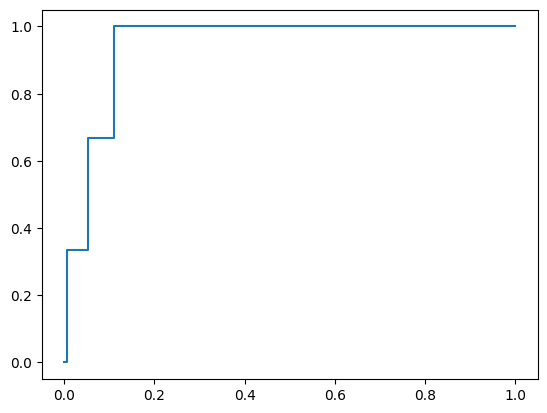

In [ ]:
plt.plot(false_pos_roc, true_pos_roc)

<BarContainer object of 4 artists>

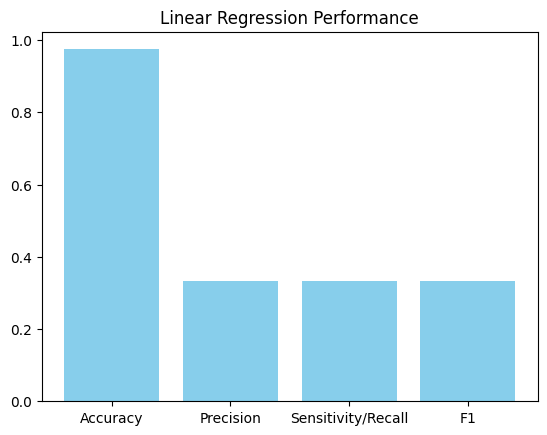

In [ ]:
analysis = ["Accuracy", "Precision", "Sensitivity/Recall", "F1"]
values = [accuracy, precision, sensitivity_recall, f_1]

plt.title('Linear Regression Performance')
plt.bar(analysis, values, color='skyblue')